### Spark Foundation

### Intern :- Omkar Dalvi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px


C:\Users\omkar\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df= pd.read_csv('matches.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
def data_inv(df):
    print('Number of Rows:',df.shape[0]) 
    print('dataset variables: ',df.shape[1])    
    print('-'*70)
    print('dataset columns :\n') # All column_Name
    print(df.columns)
    print('-'*70)
    print('data-type of each column: \n') # 
    print(df.dtypes)
    print('-'*70)
    print('Missing rows in each column: \n')
    c=df.isnull().sum()
    print(c[c>0])
    
data_inv(df)

Number of Rows: 756
dataset variables:  18
----------------------------------------------------------------------
dataset columns :

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')
----------------------------------------------------------------------
data-type of each column: 

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object
-------------------------

In [5]:
df = df.drop(columns=['umpire3'], axis=1)

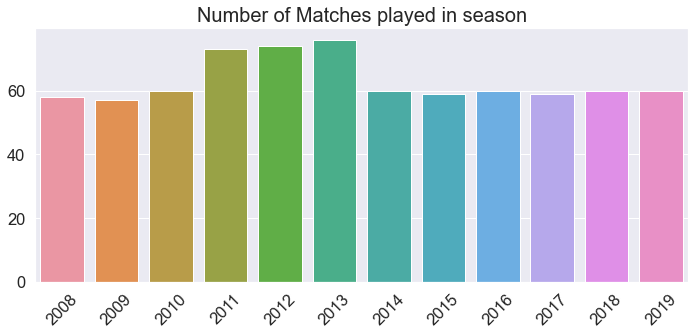

In [6]:
sns.set(font_scale=1.5)
plt.figure(figsize=(10,5))
sns.countplot(x='season',data=df);
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.title('Number of Matches played in season', fontsize=20)
plt.tight_layout()

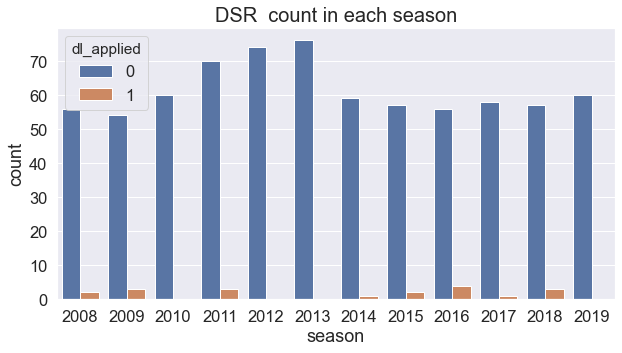

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="season",hue='dl_applied')
plt.title('DSR  count in each season', fontsize=20)
plt.show()

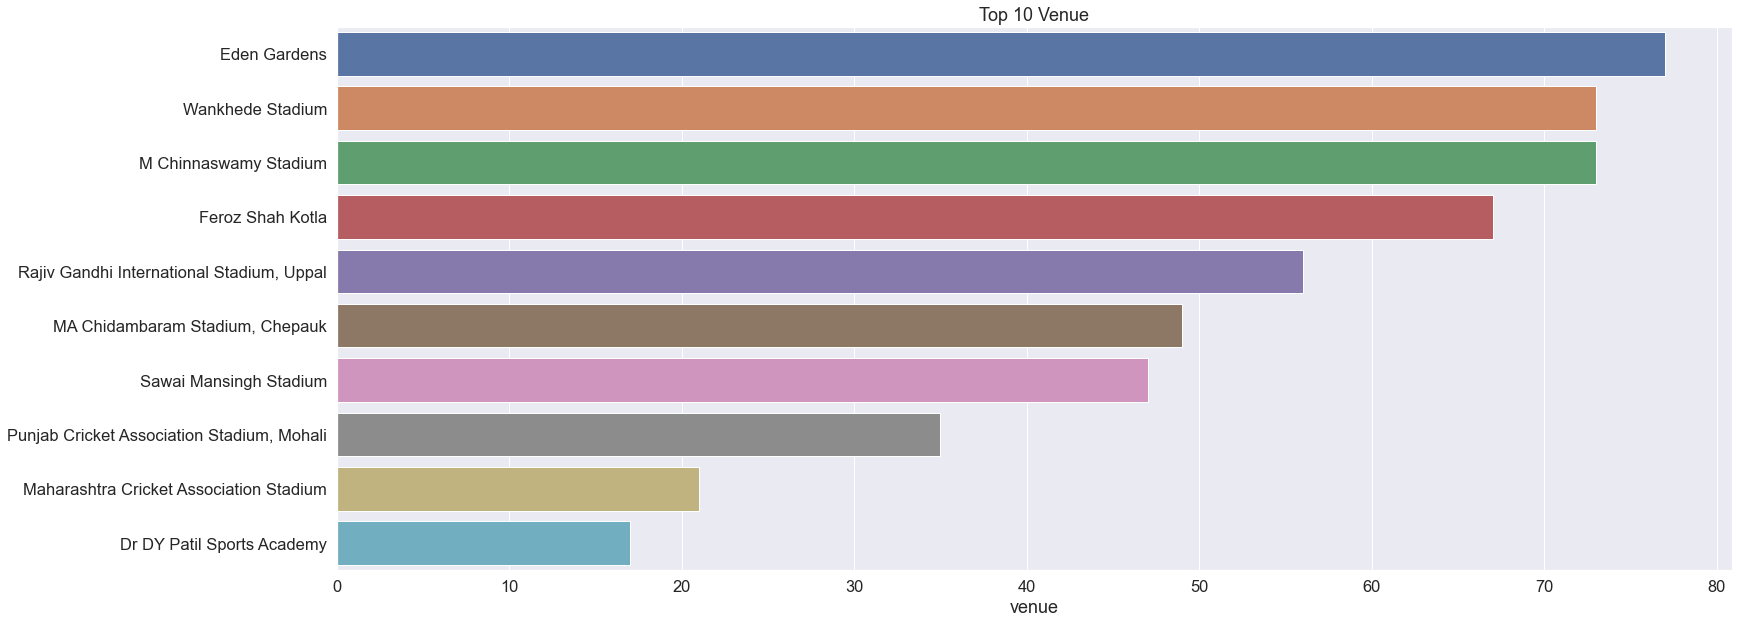

In [8]:
plt.subplots(figsize=(25,10))
sns.barplot(data=df,x=df['venue'].value_counts(),y=df['venue'].value_counts().index,
           order = df['venue'].value_counts().iloc[:10].index)
plt.title('Top 10 Venue')
plt.show()

### Result of Matches

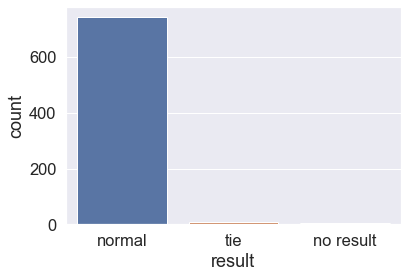

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [9]:
plt.title('')
sns.countplot(df['result'])
plt.show()
df['result'].value_counts()

### Top 10 Man of the Mach award players

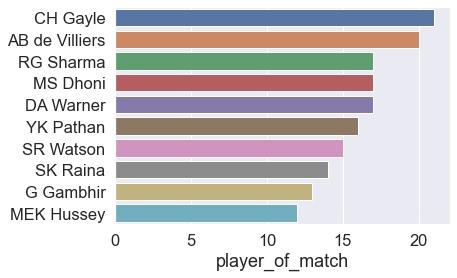

In [10]:
plt.subplots()
sns.barplot(data=df,x=df['player_of_match'].value_counts(),y=df['player_of_match'].value_counts().index,
           order = df['player_of_match'].value_counts().iloc[:10].index)
plt.show()

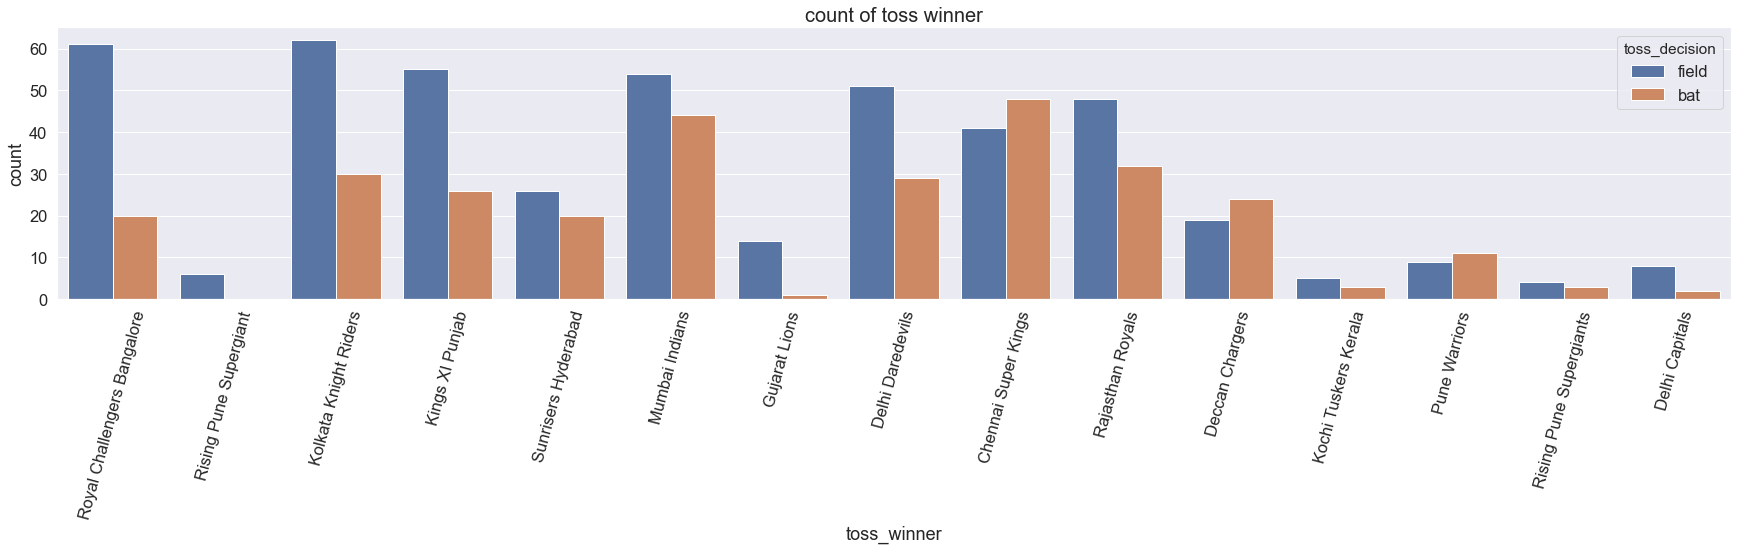

In [11]:
plt.figure(figsize=(30,5))
sns.countplot(data=df,x="toss_winner",hue='toss_decision')
plt.title('count of toss winner', fontsize=20)
plt.xticks(rotation=75)
plt.show()

### Decision of toss-winning team

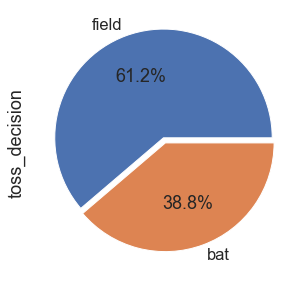

In [12]:
df1 = df['toss_decision'].value_counts()
df1.plot(kind='pie',explode = (0.05, 0), autopct='%1.1f%%' ,subplots=True, figsize=(5, 5))
plt.show()

### Does toss winning  helps in match winning?

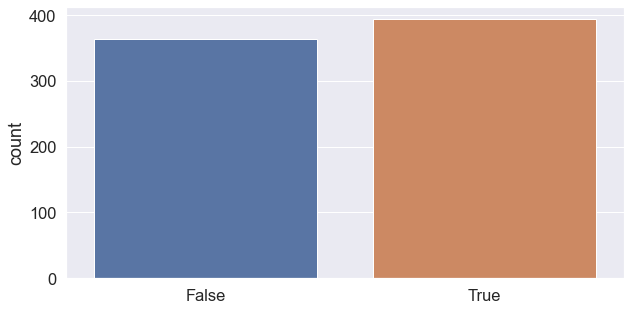

In [13]:
Match_winning = df['toss_winner'] == df['winner']
plt.figure(figsize=(10,5))
sns.countplot(Match_winning)
plt.show()

### Does Choosing bating or field helps in match winning

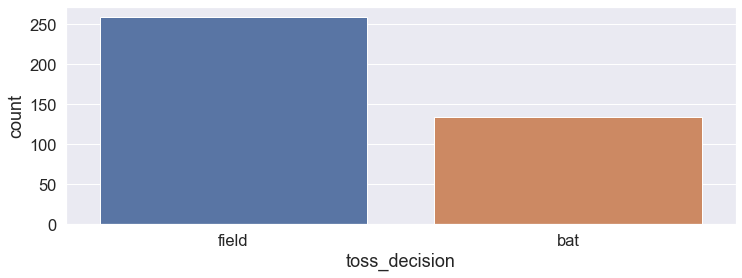

In [14]:
plt.figure(figsize=(12,4))
sns.countplot(df.toss_decision[df.toss_winner==df.winner])
plt.show()

In [15]:
year = 2008
Max_winning_run = []
season = []

while year<2020:
    season.append(year)
    Max_winning_run.append(df[df['season']==year]['win_by_runs'].max())
    year+=1    

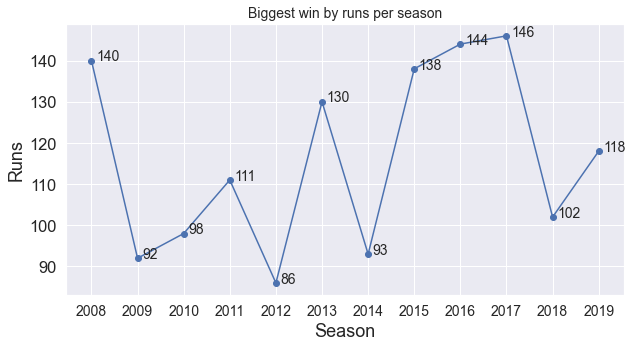

In [16]:
plt.figure(figsize=(10,5))
plt.plot(season,Max_winning_run)
plt.scatter(season,Max_winning_run)
count=0
while count < 12:
    plt.text(season[count]+0.1,Max_winning_run[count],str(Max_winning_run[count]),size=14)
    count+=1
plt.xticks(range(2008,2020),fontsize=14)
plt.xlabel('Season')
plt.ylabel('Runs')
plt.title('Biggest win by runs per season',fontsize=14)
plt.show()

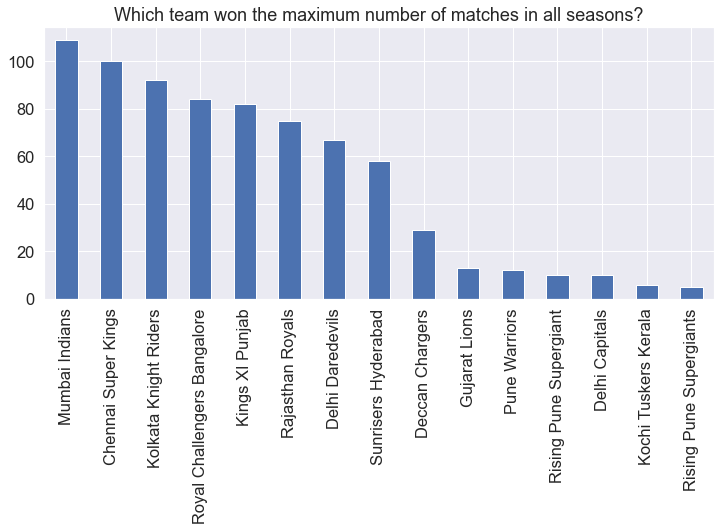

In [17]:
plt.figure(figsize=(12,5))
plt.title('Which team won the maximum number of matches in all seasons?')
df['winner'].value_counts().plot(kind="bar")
plt.show()

In [18]:
### Reference from Kaggle